# Calls Data Capstone Project

For this capstone project we will be analyzing some 911 call data from Kaggle. The data contains the following fields:

lat : String variable, Latitude

lng: String variable, Longitude

desc: String variable, Description of the Emergency Call

zip: String variable, Zipcode

title: String variable, Title

timeStamp: String variable, YYYY-MM-DD HH:MM:SS

twp: String variable, Township

addr: String variable, Address

e: String variable, Dummy variable (always 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
# Creating New Features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [6]:
df['Reason'] = df['title'].apply(lambda title:title.split(':')[0])
df[['title','Reason']]

,title,Reason
0,EMS: BACK PAINS/INJURY,EMS
1,EMS: DIABETIC EMERGENCY,EMS
2,Fire: GAS-ODOR/LEAK,Fire
3,EMS: CARDIAC EMERGENCY,EMS
4,EMS: DIZZINESS,EMS
...,...,...
99487,Traffic: VEHICLE ACCIDENT -,Traffic
99488,Traffic: VEHICLE ACCIDENT -,Traffic
99489,EMS: FALL VICTIM,EMS
99490,EMS: NAUSEA/VOMITING,EMS


In [7]:
# Most common reason for 911 calls

In [8]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

In [9]:
sns.set_style('whitegrid')

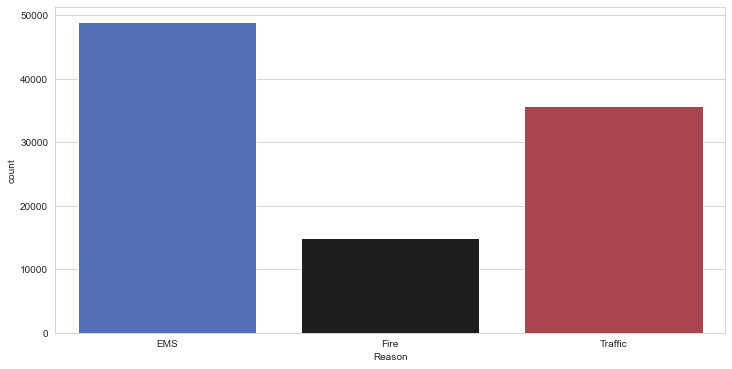

In [37]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='Reason',data=df,palette='icefire');
fig.savefig("Countplot_Plot_Reason.png")



In [11]:
# Now Lects Focus On Timestamp column
# First Get the dtype of timestamp

In [12]:
df['timeStamp'].dtype

dtype('O')

In [13]:
# Now convert the dtype of timestamp to work with timestamp column

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp']

** You can now grab specific attributes from a Datetime object by calling them.**

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day Of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)
df[['Hour','Month','Day Of Week']].head()

,Hour,Month,Day Of Week
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3


In [16]:
# Convert the format of day from numbers to actual string values

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Day Of Week'] = df['Day Of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

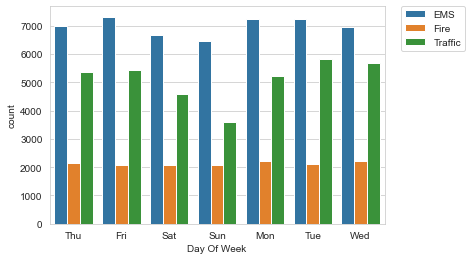

In [52]:
fig = plt.figure()
sns.countplot(x='Day Of Week',data=df,hue='Reason');
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
fig.savefig("Countplot_Day.jpg")

In [20]:
# Same for month

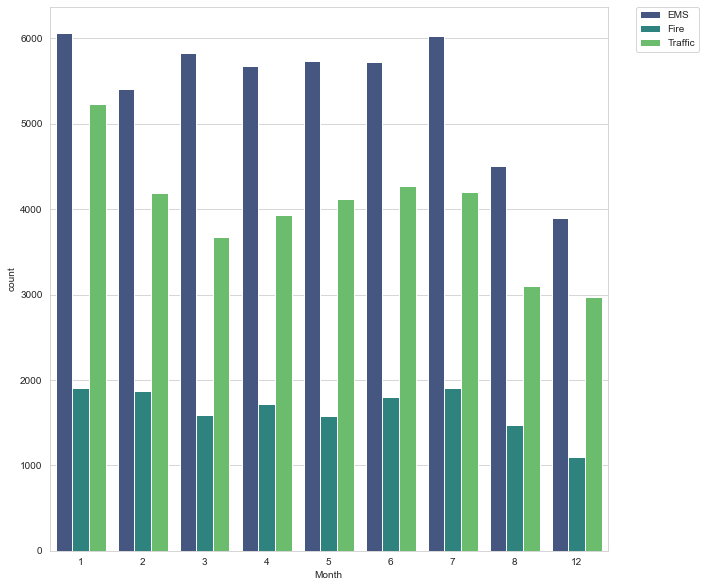

In [55]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.);
fig.savefig("CountPlot_Month.jpg")

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [22]:
bymonth=df.groupby('Month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [23]:
# Now create a simple plot off of the dataframe indicating the count of calls per month.

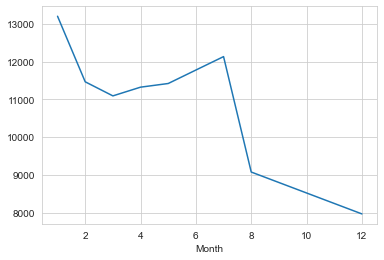

In [24]:
bymonth['twp'].plot();

In [25]:
# Create linear model graph

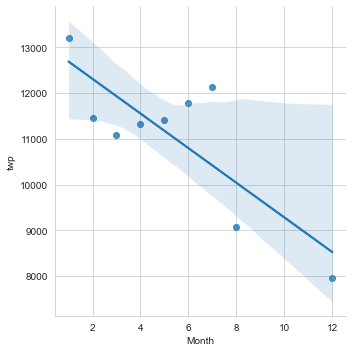

In [26]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index());

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [27]:
df['Date'] =df['timeStamp'].apply(lambda t:t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

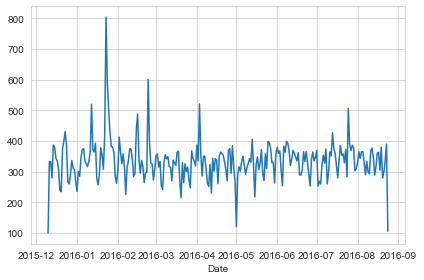

In [28]:
df.groupby('Date').count()['zip'].plot()
plt.tight_layout();

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

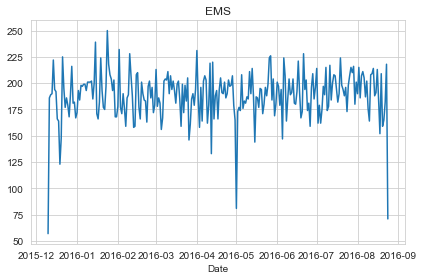

In [29]:
plt.Figure(figsize=(12,6))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title("EMS")
plt.tight_layout();

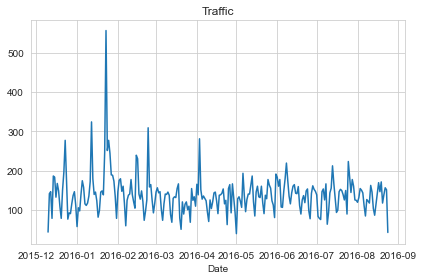

In [30]:
df[df['Reason']=='Traffic'].groupby("Date").count()['twp'].plot()
plt.title("Traffic")
plt.tight_layout();

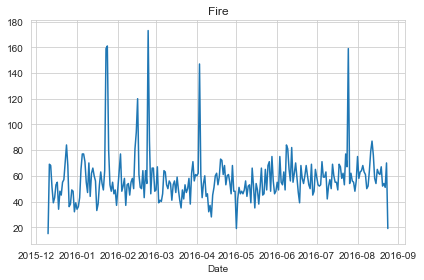

In [31]:
df[df['Reason']=="Fire"].groupby("Date").count()['Reason'].plot()
plt.title("Fire")
plt.tight_layout();

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week**

In [32]:
dayhour = df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()
dayhour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

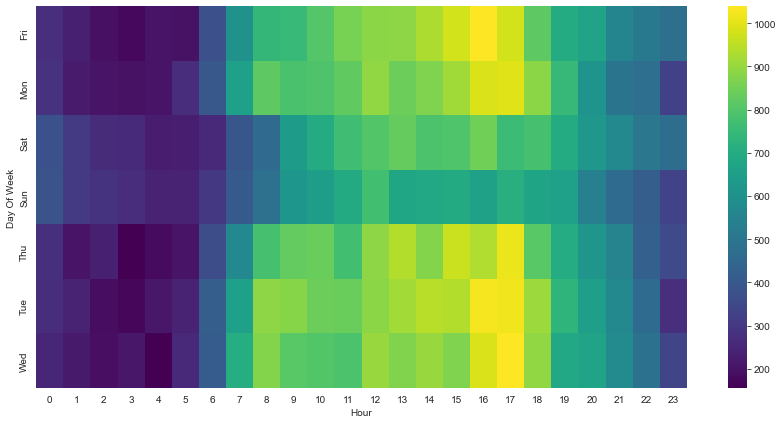

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')
plt.tight_layout();

In [34]:
# Now Create Cluster map for this DataFrame

<Figure size 864x432 with 0 Axes>

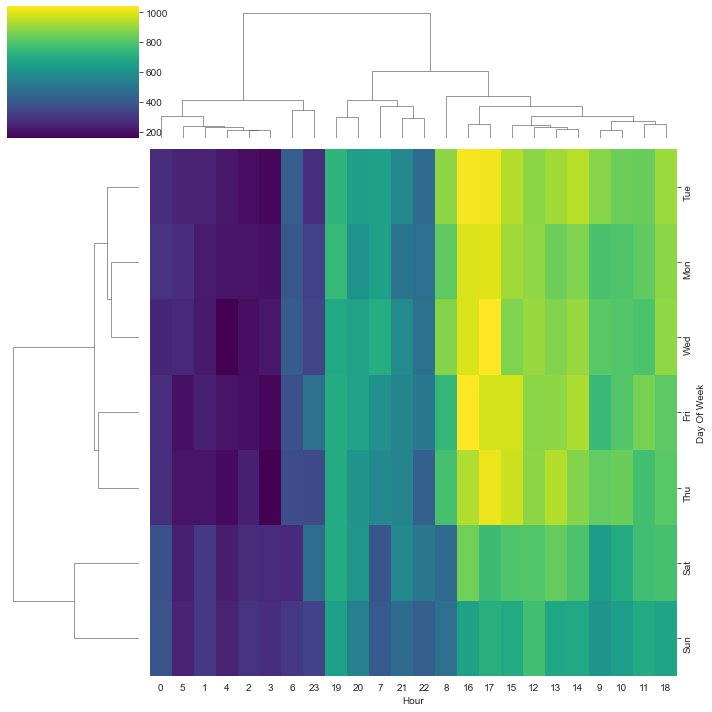

In [35]:
plt.figure(figsize=(12,6))
sns.clustermap(dayhour,cmap='viridis')
plt.tight_layout();

In [36]:
# Here I Completed my first project on 911 calls Data analysis and represent 
# some data using seaborn and matplotlib